Question 4 [Marks 80]
Student Attendance Dashboard for Decision Making. You will be given a
Google Sheet with different sheets holding data of different classes. Create
a dashboard showing a summary of what's happening across different
classes. Which students need attention for missing sessions? Which
students are unsatisfied? Which students are very satisfied? <Date>
Column shows attendance. R-<Date> Column shows the rating by the
candidate. Extra marks for identifying more useful insights. Missing values
of the Type column can be treated as STUDENT. This data gets updated on
a daily basis. The latest data gets injected in early columns. Your code
shouldn't need any changes to deal with the latest data. Please note:
Visualisation is mandatory. You will receive 0 marks if you do not add
visualisation. Data Link -
https://docs.google.com/spreadsheets/d/1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2
MJzpFA6t0AsBMi8/edit?usp=sharing

In [176]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
#reading data from google drive file so that if changes are made, code need not be updated.
sheet_id_1='1Y_g6LQI2GLqpKf-fj-rH7D9gfnP2MJzpFA6t0AsBMi8'
sheet_id_2='1zz8dedYx-9wVX64rNDuG7VZFx-aLeu7lDlL0BcjF5sw'
sheet_name_1='Class1'
sheet_name_2='Class2'
class_1=pd.read_csv("https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id_1,sheet_name_1))
class_2=pd.read_csv("https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheet_id_2,sheet_name_2))

In [178]:
class_1.shape

(57, 35)

In [179]:
class_2.shape

(70, 20)

In [180]:
# class-1
class_1.set_index('Unnamed: 0',inplace=True)
class_1.head()

,Type,10-01-21,Unnamed: 3,09-01-21,Unnamed: 5,08-01-21,Unnamed: 7,07-01-21,Unnamed: 9,06-01-21,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,WORKING,Missed,6,Missed,6,Missed,9,Missed,9,Missed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Missed,5,Missed,9,Missed,9,Attended,9,Missed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STUDENT,Missed,7,Missed,7,Missed,8,Missed,8,Attended,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STUDENT,Missed,8,Missed,6,Attended,5,Missed,6,Missed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,WORKING,Missed,10,Missed,5,Missed,9,Missed,6,Missed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
#class-2
class_2.set_index('Unnamed: 0',inplace=True)
class_2.head()

,Type,10-01-21,Unnamed: 3,09-01-21,Unnamed: 5,08-01-21,Unnamed: 7,07-01-21,Unnamed: 9,06-01-21,Unnamed: 11,05-01-21,Unnamed: 13,04-01-21,Unnamed: 15,03-01-21,Unnamed: 17,01-01-21,R-01-01-21
Unnamed: 0,,,,,,,,,,,,,,,,,,,
1,NaN,Attended,5,Attended,7,Attended,7,Attended,7,Attended,7,Attended,10,Attended,7,Missed,5,NaN,NaN
2,NaN,Attended,5,Attended,5,Attended,7,Attended,7,Attended,10,Attended,6,Attended,7,Attended,7,NaN,NaN
3,STUDENT,Missed,7,Missed,8,Missed,8,Missed,7,Missed,8,Missed,9,Missed,10,Missed,9,NaN,NaN
4,NaN,Attended,10,Attended,10,Attended,9,Attended,8,Missed,7,Missed,10,Attended,7,Attended,10,NaN,NaN
5,WORKING,Attended,7,Attended,6,Attended,6,Missed,5,Missed,10,Missed,7,Missed,8,Missed,10,NaN,NaN


In [182]:
df_1=class_1
df_2=class_2

BASIC INSIGHTS FROM DATA

In [183]:
df_1.describe()

,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.736842,7.210526,7.315789,7.491228,7.508772,7.070175,7.631579,7.263158,7.403509,7.491228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.642367,1.633760,1.681389,1.604934,1.659634,1.624144,1.531008,1.609418,1.688825,1.774047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8.000000,7.000000,7.000000,7.000000,8.000000,6.000000,8.000000,7.000000,7.000000,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,9.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df_1.columns

Index(['Type', '10-01-21', 'Unnamed: 3', '09-01-21', 'Unnamed: 5', '08-01-21',
       'Unnamed: 7', '07-01-21', 'Unnamed: 9', '06-01-21', 'Unnamed: 11',
       '05-01-21', 'Unnamed: 13', '04-01-21', 'Unnamed: 15', '03-01-21',
       'Unnamed: 17', '02-01-21', 'Unnamed: 19', '01-01-21', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34'],
      dtype='object')

In [185]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1 to 57
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         32 non-null     object 
 1   10-01-21     57 non-null     object 
 2   Unnamed: 3   57 non-null     int64  
 3   09-01-21     57 non-null     object 
 4   Unnamed: 5   57 non-null     int64  
 5   08-01-21     57 non-null     object 
 6   Unnamed: 7   57 non-null     int64  
 7   07-01-21     56 non-null     object 
 8   Unnamed: 9   57 non-null     int64  
 9   06-01-21     56 non-null     object 
 10  Unnamed: 11  57 non-null     int64  
 11  05-01-21     56 non-null     object 
 12  Unnamed: 13  57 non-null     int64  
 13  04-01-21     56 non-null     object 
 14  Unnamed: 15  57 non-null     int64  
 15  03-01-21     56 non-null     object 
 16  Unnamed: 17  57 non-null     int64  
 17  02-01-21     56 non-null     object 
 18  Unnamed: 19  57 non-null     int64  
 19  01-01-21  

In [186]:
df_2.describe()

,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,01-01-21,R-01-01-21
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,0.0,0.0
mean,7.257143,7.528571,7.314286,7.528571,7.071429,7.342857,7.442857,7.414286,NaN,NaN
std,1.691288,1.775203,1.499206,1.700140,1.618027,1.649644,1.611874,1.914800,NaN,NaN
min,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,NaN,NaN
25%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,NaN,NaN
50%,7.000000,7.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,NaN,NaN
75%,8.000000,9.000000,8.750000,9.000000,8.000000,9.000000,9.000000,9.000000,NaN,NaN
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN


In [187]:
df_2.columns

Index(['Type', '10-01-21', 'Unnamed: 3', '09-01-21', 'Unnamed: 5', '08-01-21',
       'Unnamed: 7', '07-01-21', 'Unnamed: 9', '06-01-21', 'Unnamed: 11',
       '05-01-21', 'Unnamed: 13', '04-01-21', 'Unnamed: 15', '03-01-21',
       'Unnamed: 17', '01-01-21', 'R-01-01-21'],
      dtype='object')

In [188]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 1 to 70
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         30 non-null     object 
 1   10-01-21     70 non-null     object 
 2   Unnamed: 3   70 non-null     int64  
 3   09-01-21     70 non-null     object 
 4   Unnamed: 5   70 non-null     int64  
 5   08-01-21     70 non-null     object 
 6   Unnamed: 7   70 non-null     int64  
 7   07-01-21     69 non-null     object 
 8   Unnamed: 9   70 non-null     int64  
 9   06-01-21     69 non-null     object 
 10  Unnamed: 11  70 non-null     int64  
 11  05-01-21     69 non-null     object 
 12  Unnamed: 13  70 non-null     int64  
 13  04-01-21     69 non-null     object 
 14  Unnamed: 15  70 non-null     int64  
 15  03-01-21     67 non-null     object 
 16  Unnamed: 17  70 non-null     int64  
 17  01-01-21     0 non-null      float64
 18  R-01-01-21   0 non-null      float64
dtypes: float64

In [189]:
df_1['Type']=df_1['Type'].fillna(value='STUDENT')
df_2['Type']=df_2['Type'].fillna(value='STUDENT')

OPERATIONS ON CLASS 1

In [190]:
df1=df_1.iloc[:,:21]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1 to 57
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         57 non-null     object
 1   10-01-21     57 non-null     object
 2   Unnamed: 3   57 non-null     int64 
 3   09-01-21     57 non-null     object
 4   Unnamed: 5   57 non-null     int64 
 5   08-01-21     57 non-null     object
 6   Unnamed: 7   57 non-null     int64 
 7   07-01-21     56 non-null     object
 8   Unnamed: 9   57 non-null     int64 
 9   06-01-21     56 non-null     object
 10  Unnamed: 11  57 non-null     int64 
 11  05-01-21     56 non-null     object
 12  Unnamed: 13  57 non-null     int64 
 13  04-01-21     56 non-null     object
 14  Unnamed: 15  57 non-null     int64 
 15  03-01-21     56 non-null     object
 16  Unnamed: 17  57 non-null     int64 
 17  02-01-21     56 non-null     object
 18  Unnamed: 19  57 non-null     int64 
 19  01-01-21     56 non-null     ob

In [191]:
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 57
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         56 non-null     object
 1   10-01-21     56 non-null     object
 2   Unnamed: 3   56 non-null     int64 
 3   09-01-21     56 non-null     object
 4   Unnamed: 5   56 non-null     int64 
 5   08-01-21     56 non-null     object
 6   Unnamed: 7   56 non-null     int64 
 7   07-01-21     56 non-null     object
 8   Unnamed: 9   56 non-null     int64 
 9   06-01-21     56 non-null     object
 10  Unnamed: 11  56 non-null     int64 
 11  05-01-21     56 non-null     object
 12  Unnamed: 13  56 non-null     int64 
 13  04-01-21     56 non-null     object
 14  Unnamed: 15  56 non-null     int64 
 15  03-01-21     56 non-null     object
 16  Unnamed: 17  56 non-null     int64 
 17  02-01-21     56 non-null     object
 18  Unnamed: 19  56 non-null     int64 
 19  01-01-21     56 non-null     ob

In [192]:
df1.iloc[2,:][1:].value_counts()

Missed      6
7           4
Attended    4
8           2
10          2
9           1
6           1
Name: 3, dtype: int64

In [193]:
df1['Missed']=0
df1['Attended']=1

In [194]:
for i in df1.index:
    temp=df1.loc[i,:][1:].value_counts()
    if 'Missed' in temp:
        df1.loc[i,'Missed']=temp['Missed']
    if 'Attended' in temp:
        df1.loc[i,'Attended']=temp['Attended']
df1.head()

,Type,10-01-21,Unnamed: 3,09-01-21,Unnamed: 5,08-01-21,Unnamed: 7,07-01-21,Unnamed: 9,06-01-21,...,04-01-21,Unnamed: 15,03-01-21,Unnamed: 17,02-01-21,Unnamed: 19,01-01-21,Unnamed: 21,Missed,Attended
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,WORKING,Missed,6,Missed,6,Missed,9,Missed,9,Missed,...,Missed,9,Missed,6,Missed,7,Missed,8,10,1
2,STUDENT,Missed,5,Missed,9,Missed,9,Attended,9,Missed,...,Attended,6,Missed,9,Attended,10,Missed,6,6,4
3,STUDENT,Missed,7,Missed,7,Missed,8,Missed,8,Attended,...,Missed,9,Missed,7,Attended,6,Attended,10,6,4
4,STUDENT,Missed,8,Missed,6,Attended,5,Missed,6,Missed,...,Attended,6,Attended,6,Attended,7,Attended,10,5,5
5,WORKING,Missed,10,Missed,5,Missed,9,Missed,6,Missed,...,Missed,7,Missed,10,Missed,10,Missed,9,10,1


In [195]:
#defining '%missed' column
df1['%missed']=(df1['Missed']*100)/(df1['Missed']+df1['Attended'])

In [196]:
df1['%missed'].describe()

count    56.000000
mean     45.827922
std      37.767041
min       0.000000
25%      10.000000
50%      45.000000
75%      90.909091
max      90.909091
Name: %missed, dtype: float64

In [197]:
#setting the threshold at 40%
df1['need_attendance_related_attension']=False
for i in df1.index:
    if df1.loc[i,'%missed']<40:
        df1['need_attendance_related_attension']=True

<Axes: title={'center': 'STUDENTS WHO NEED ATTENDANCE RELATED ATTENTION(CLASS 1)'}, xlabel='Number of students', ylabel='Kind of student'>

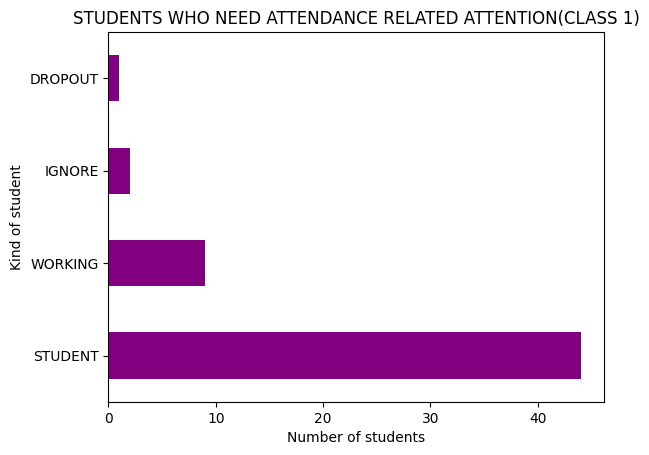

In [198]:
need_attention_student_list_1=df1[df1['need_attendance_related_attension']==True].index
need_attention_student_list_1

df1.loc[need_attention_student_list_1,'Type'].value_counts().plot(kind='barh', color='purple', xlabel='Number of students', ylabel='Kind of student', title='STUDENTS WHO NEED ATTENDANCE RELATED ATTENTION(CLASS 1)')

In [199]:
df1.iloc[1,2::2].index[:-3]

Index(['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11',
       'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17', 'Unnamed: 19'],
      dtype='object')

In [200]:
#rating analysis
df1['avg_rating']=0
for i in df1.index:
    df1.loc[i,'avg_rating']=df1.loc[i,df1.iloc[1,2::2].index[:-3]][:-2].mean()

In [201]:
df1['avg_rating'].describe()

count    56.000000
mean      7.428571
std       0.660578
min       6.285714
25%       6.964286
50%       7.357143
75%       8.000000
max       8.857143
Name: avg_rating, dtype: float64

In [202]:
#above 8 average rating shows satisfaction
df1['satisfied']=(df1['avg_rating']>=8)

In [203]:
student_satisfied_1=df1[df1['satisfied']==True].index
student_unsatisfied_1=df1[df1['satisfied']==False].index
print('no of satisfied students = {}'.format(len(student_satisfied_1)))
print('no of unsatisfied students = {}'.format(len(student_unsatisfied_1)))

no of satisfied students = 15
no of unsatisfied students = 41


<Axes: title={'center': 'DISTRIBUTION OF SATISFIED STUDENTS(CLASS 1)'}>

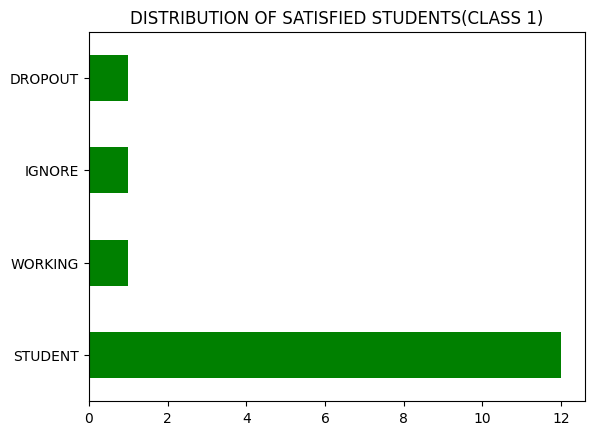

In [243]:
df1.loc[student_satisfied_1,'Type'].value_counts().plot(kind='barh', title='DISTRIBUTION OF SATISFIED STUDENTS(CLASS 1)', color='green')

FROM HERE WE CAN SEE THAT HIGHLY SATIFIED ARE THE ONES WHO ARE STUDENTS FOLLOWED BY WORKING PROFESSIONALS.

<Axes: title={'center': 'DISTRIBUTION OF UNSATISFIED STUDENTS(CLASS 1)'}>

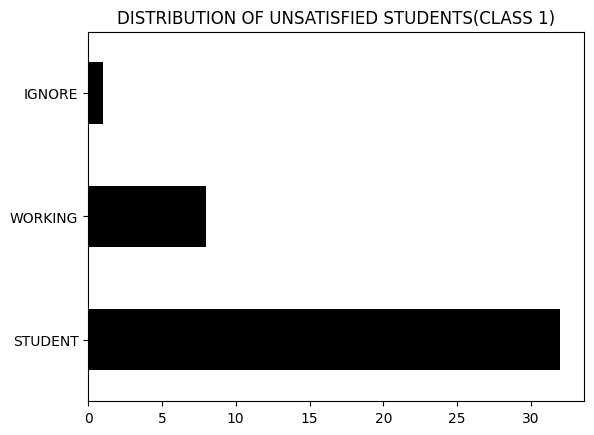

In [205]:
df1.loc[student_unsatisfied_1,'Type'].value_counts().plot(kind='barh', title='DISTRIBUTION OF UNSATISFIED STUDENTS(CLASS 1)', color='black')

FROM HERE WE CAN SEE THAT HIGHLY UNSATISFIED GROUP IS ALSO THAT OF STUDENTS BUT THIS ALSO INVOLVES STUDENTS FROM OTHER GROUP AS WELL.

OPERATIONS ON CLASS 2

In [206]:
df2=df_2.iloc[:,:-2]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 1 to 70
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         70 non-null     object
 1   10-01-21     70 non-null     object
 2   Unnamed: 3   70 non-null     int64 
 3   09-01-21     70 non-null     object
 4   Unnamed: 5   70 non-null     int64 
 5   08-01-21     70 non-null     object
 6   Unnamed: 7   70 non-null     int64 
 7   07-01-21     69 non-null     object
 8   Unnamed: 9   70 non-null     int64 
 9   06-01-21     69 non-null     object
 10  Unnamed: 11  70 non-null     int64 
 11  05-01-21     69 non-null     object
 12  Unnamed: 13  70 non-null     int64 
 13  04-01-21     69 non-null     object
 14  Unnamed: 15  70 non-null     int64 
 15  03-01-21     67 non-null     object
 16  Unnamed: 17  70 non-null     int64 
dtypes: int64(8), object(9)
memory usage: 9.8+ KB


In [207]:
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 1 to 70
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         67 non-null     object
 1   10-01-21     67 non-null     object
 2   Unnamed: 3   67 non-null     int64 
 3   09-01-21     67 non-null     object
 4   Unnamed: 5   67 non-null     int64 
 5   08-01-21     67 non-null     object
 6   Unnamed: 7   67 non-null     int64 
 7   07-01-21     67 non-null     object
 8   Unnamed: 9   67 non-null     int64 
 9   06-01-21     67 non-null     object
 10  Unnamed: 11  67 non-null     int64 
 11  05-01-21     67 non-null     object
 12  Unnamed: 13  67 non-null     int64 
 13  04-01-21     67 non-null     object
 14  Unnamed: 15  67 non-null     int64 
 15  03-01-21     67 non-null     object
 16  Unnamed: 17  67 non-null     int64 
dtypes: int64(8), object(9)
memory usage: 9.4+ KB


In [208]:
df2['Missed']=0
df2['Attended']=1

In [209]:
for i in df2.index:
    temp=df2.loc[i,:][1:].value_counts()
    if 'Missed' in temp:
        df2.loc[i,'Missed']=temp['Missed']
    if 'Attended' in temp:
        df2.loc[i,'Attended']=temp['Attended']
df2.head()

,Type,10-01-21,Unnamed: 3,09-01-21,Unnamed: 5,08-01-21,Unnamed: 7,07-01-21,Unnamed: 9,06-01-21,Unnamed: 11,05-01-21,Unnamed: 13,04-01-21,Unnamed: 15,03-01-21,Unnamed: 17,Missed,Attended
Unnamed: 0,,,,,,,,,,,,,,,,,,,
1,STUDENT,Attended,5,Attended,7,Attended,7,Attended,7,Attended,7,Attended,10,Attended,7,Missed,5,1,7
2,STUDENT,Attended,5,Attended,5,Attended,7,Attended,7,Attended,10,Attended,6,Attended,7,Attended,7,0,8
3,STUDENT,Missed,7,Missed,8,Missed,8,Missed,7,Missed,8,Missed,9,Missed,10,Missed,9,8,1
4,STUDENT,Attended,10,Attended,10,Attended,9,Attended,8,Missed,7,Missed,10,Attended,7,Attended,10,2,6
5,WORKING,Attended,7,Attended,6,Attended,6,Missed,5,Missed,10,Missed,7,Missed,8,Missed,10,5,3


In [210]:
#define '%missed' column
df2['%missed']=(df2['Missed']*100)/(df2['Missed']+df2['Attended'])
df2['%missed'].describe()

count    67.000000
mean     38.080431
std      37.309459
min       0.000000
25%       0.000000
50%      25.000000
75%      88.888889
max      88.888889
Name: %missed, dtype: float64

In [211]:
#set the threshold at 40%
df2['need_attendance_related_attension']=False
for i in df2.index:
    if df2.loc[i,'%missed']<40:
        df2['need_attendance_related_attension']=True

<Axes: title={'center': 'STUDENTS WHO NEED ATTENDANCE RELATED ATTENTION(CLASS 2)'}, xlabel='Number of students', ylabel='Kind of student'>

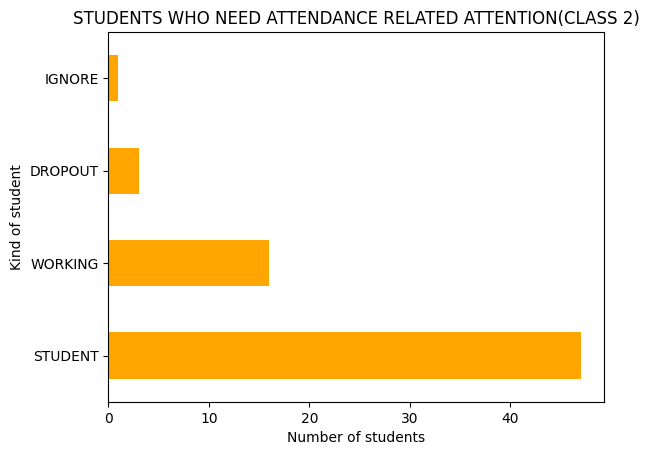

In [212]:
need_attention_student_list=df2[df2['need_attendance_related_attension']==True].index
need_attention_student_list
df2.loc[need_attention_student_list,'Type'].value_counts().plot(kind='barh', color='ORANGE', xlabel='Number of students', ylabel='Kind of student', title='STUDENTS WHO NEED ATTENDANCE RELATED ATTENTION(CLASS 2)')

In [213]:
df2['avg_rating']=0
for i in df2.index:
    df2.loc[i,'avg_rating']=df2.loc[i,df2.iloc[1,2::2].index[:-3]][:-2].mean()

In [214]:
df2['avg_rating'].describe()

count    67.000000
mean      7.304478
std       0.776440
min       5.800000
25%       6.600000
50%       7.200000
75%       7.800000
max       9.200000
Name: avg_rating, dtype: float64

In [215]:
#above 8 average rating shows satisfaction

df2['satisfied']=(df2['avg_rating']>=8)

In [216]:
student_satisfied_2=df2[df2['satisfied']==True].index
student_unsatisfied_2=df2[df2['satisfied']==False].index
print(" ")
print("DISTRIBUTION OF SATISFIED AND UNSATISFIED STUDENTS")
print('Number of satisfied students= {}'.format(len(student_satisfied_2)))
print('Number of unsatisfied students= {}'.format(len(student_unsatisfied_2)))

 
DISTRIBUTION OF SATISFIED AND UNSATISFIED STUDENTS
Number of satisfied students= 14
Number of unsatisfied students= 53


<Axes: title={'center': 'DISTRIBUTION OF SATISFIED STUDENTS(CLASS 2)'}>

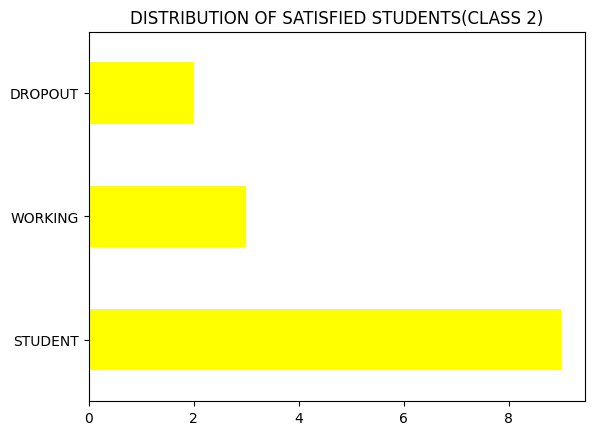

In [217]:
df2.loc[student_satisfied_2,'Type'].value_counts().plot(kind='barh', title='DISTRIBUTION OF SATISFIED STUDENTS(CLASS 2)', color='YELLOW')

FROM HERE WE CAN AGAIN SEE THAT HIGHLY SATISFIED GROUP IS THAT OF STUDENTS FOLLOWED BY WORKING BUT HERE INCLASS 2 WE CAN SEE THAT A FEW NUMBER OF DROUPOUT STUDENTS ARE ALSO SATISFIED.

<Axes: title={'center': 'DISTRIBUTION OF UNSATISFIED STUDENTS(CLASS 2)'}>

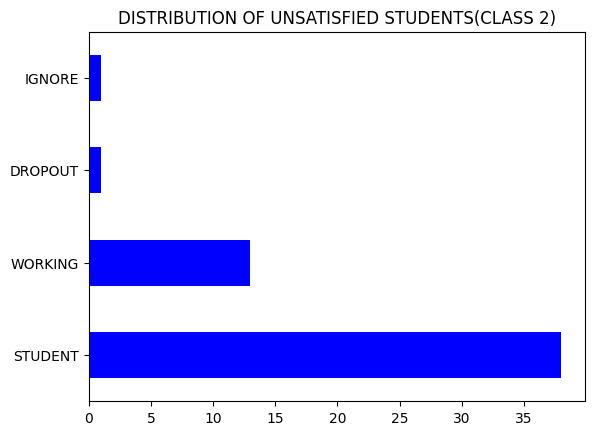

In [218]:
df2.loc[student_unsatisfied_2,'Type'].value_counts().plot(kind='barh', title='DISTRIBUTION OF UNSATISFIED STUDENTS(CLASS 2)', color='blue')

AGAIN WE CAN SEE THAT HIGHLY UNSATISFIED GROUP IS AGAIN OF STUDENTS FOLLOWED BY WORKING THEN DROPOUT AND THEN IGNORE.

NOW TO SEE SOME MORE INSIGHTS ON OUR DATA WE CAN MERGE THE DATA OF CLASS 1 AND CLASS 2 AND PERFORM SOME MORE VISUALIZATIONS.

In [219]:
df = pd.concat([df1, df2])

In [220]:
df.head()

,Type,10-01-21,Unnamed: 3,09-01-21,Unnamed: 5,08-01-21,Unnamed: 7,07-01-21,Unnamed: 9,06-01-21,...,02-01-21,Unnamed: 19,01-01-21,Unnamed: 21,Missed,Attended,%missed,need_attendance_related_attension,avg_rating,satisfied
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,WORKING,Missed,6,Missed,6,Missed,9,Missed,9,Missed,...,Missed,7.0,Missed,8.0,10,1,90.909091,True,7.714286,False
2,STUDENT,Missed,5,Missed,9,Missed,9,Attended,9,Missed,...,Attended,10.0,Missed,6.0,6,4,60.000000,True,7.428571,False
3,STUDENT,Missed,7,Missed,7,Missed,8,Missed,8,Attended,...,Attended,6.0,Attended,10.0,6,4,60.000000,True,8.000000,True
4,STUDENT,Missed,8,Missed,6,Attended,5,Missed,6,Missed,...,Attended,7.0,Attended,10.0,5,5,50.000000,True,6.285714,False
5,WORKING,Missed,10,Missed,5,Missed,9,Missed,6,Missed,...,Missed,10.0,Missed,9.0,10,1,90.909091,True,7.285714,False


In [221]:
df.columns

Index(['Type', '10-01-21', 'Unnamed: 3', '09-01-21', 'Unnamed: 5', '08-01-21',
       'Unnamed: 7', '07-01-21', 'Unnamed: 9', '06-01-21', 'Unnamed: 11',
       '05-01-21', 'Unnamed: 13', '04-01-21', 'Unnamed: 15', '03-01-21',
       'Unnamed: 17', '02-01-21', 'Unnamed: 19', '01-01-21', 'Unnamed: 21',
       'Missed', 'Attended', '%missed', 'need_attendance_related_attension',
       'avg_rating', 'satisfied'],
      dtype='object')

In [222]:
df.rename(columns={'Unnamed: 3': 'Rating_10', 'Unnamed: 5': 'Rating_9', 'Unnamed: 7': 'Rating_8'}, inplace=True)

In [223]:
df.rename(columns={'Unnamed: 9': 'Rating_7', 'Unnamed: 11': 'Rating_6', 'Unnamed: 13': 'Rating_5'}, inplace=True)

In [224]:
df.rename(columns={'Unnamed: 15': 'Rating_4', 'Unnamed: 17': 'Rating_3', 'Unnamed: 19': 'Rating_2', 'Unnamed: 21': 'Rating_1'}, inplace=True)

In [225]:
df.head()

,Type,10-01-21,Rating_10,09-01-21,Rating_9,08-01-21,Rating_8,07-01-21,Rating_7,06-01-21,...,02-01-21,Rating_2,01-01-21,Rating_1,Missed,Attended,%missed,need_attendance_related_attension,avg_rating,satisfied
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,WORKING,Missed,6,Missed,6,Missed,9,Missed,9,Missed,...,Missed,7.0,Missed,8.0,10,1,90.909091,True,7.714286,False
2,STUDENT,Missed,5,Missed,9,Missed,9,Attended,9,Missed,...,Attended,10.0,Missed,6.0,6,4,60.000000,True,7.428571,False
3,STUDENT,Missed,7,Missed,7,Missed,8,Missed,8,Attended,...,Attended,6.0,Attended,10.0,6,4,60.000000,True,8.000000,True
4,STUDENT,Missed,8,Missed,6,Attended,5,Missed,6,Missed,...,Attended,7.0,Attended,10.0,5,5,50.000000,True,6.285714,False
5,WORKING,Missed,10,Missed,5,Missed,9,Missed,6,Missed,...,Missed,10.0,Missed,9.0,10,1,90.909091,True,7.285714,False


In [226]:
df.shape

(123, 27)

In [227]:
df.isnull().sum()

Type                                  0
10-01-21                              0
Rating_10                             0
09-01-21                              0
Rating_9                              0
08-01-21                              0
Rating_8                              0
07-01-21                              0
Rating_7                              0
06-01-21                              0
Rating_6                              0
05-01-21                              0
Rating_5                              0
04-01-21                              0
Rating_4                              0
03-01-21                              0
Rating_3                              0
02-01-21                             67
Rating_2                             67
01-01-21                             67
Rating_1                             67
Missed                                0
Attended                              0
%missed                               0
need_attendance_related_attension     0


In [228]:
df.fillna(0,inplace=True)

In [229]:
df.head()

,Type,10-01-21,Rating_10,09-01-21,Rating_9,08-01-21,Rating_8,07-01-21,Rating_7,06-01-21,...,02-01-21,Rating_2,01-01-21,Rating_1,Missed,Attended,%missed,need_attendance_related_attension,avg_rating,satisfied
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,WORKING,Missed,6,Missed,6,Missed,9,Missed,9,Missed,...,Missed,7.0,Missed,8.0,10,1,90.909091,True,7.714286,False
2,STUDENT,Missed,5,Missed,9,Missed,9,Attended,9,Missed,...,Attended,10.0,Missed,6.0,6,4,60.000000,True,7.428571,False
3,STUDENT,Missed,7,Missed,7,Missed,8,Missed,8,Attended,...,Attended,6.0,Attended,10.0,6,4,60.000000,True,8.000000,True
4,STUDENT,Missed,8,Missed,6,Attended,5,Missed,6,Missed,...,Attended,7.0,Attended,10.0,5,5,50.000000,True,6.285714,False
5,WORKING,Missed,10,Missed,5,Missed,9,Missed,6,Missed,...,Missed,10.0,Missed,9.0,10,1,90.909091,True,7.285714,False


In [230]:
df['Total_Sessions'] = df[['Attended', 'Missed']].sum(axis=1)

In [231]:
df['%Attended'] = (df['Attended'] / df['Total_Sessions']) * 100

In [232]:
df.head()

,Type,10-01-21,Rating_10,09-01-21,Rating_9,08-01-21,Rating_8,07-01-21,Rating_7,06-01-21,...,01-01-21,Rating_1,Missed,Attended,%missed,need_attendance_related_attension,avg_rating,satisfied,Total_Sessions,%Attended
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,WORKING,Missed,6,Missed,6,Missed,9,Missed,9,Missed,...,Missed,8.0,10,1,90.909091,True,7.714286,False,11,9.090909
2,STUDENT,Missed,5,Missed,9,Missed,9,Attended,9,Missed,...,Missed,6.0,6,4,60.000000,True,7.428571,False,10,40.000000
3,STUDENT,Missed,7,Missed,7,Missed,8,Missed,8,Attended,...,Attended,10.0,6,4,60.000000,True,8.000000,True,10,40.000000
4,STUDENT,Missed,8,Missed,6,Attended,5,Missed,6,Missed,...,Attended,10.0,5,5,50.000000,True,6.285714,False,10,50.000000
5,WORKING,Missed,10,Missed,5,Missed,9,Missed,6,Missed,...,Missed,9.0,10,1,90.909091,True,7.285714,False,11,9.090909


SOME MORE VISUALIZATIONS

In [233]:
student_data = df[df['Type'] == 'STUDENT']
working_data = df[df['Type'] == 'WORKING']
ignore_data = df[df['Type'] == 'IGNORE']
dropout_data = df[df['Type'] == 'DROPOUT']

# Prepare data for plotting
types = ['Student', 'Working', 'IGNORE', 'Dropout']
attended_percentage = [
    student_data['%Attended'].mean(),
    working_data['%Attended'].mean(),
    ignore_data['%Attended'].mean(),
    dropout_data['%Attended'].mean()
]

missed_percentage = [
    student_data['%missed'].mean(),
    working_data['%missed'].mean(),
    ignore_data['%missed'].mean(),
    dropout_data['%missed'].mean()
]

In [234]:
# Set the width of each bar
bar_width = 0.3

# Set the positions of the bars on the x-axis
r1 = range(len(types))
r2 = [x + bar_width for x in r1]

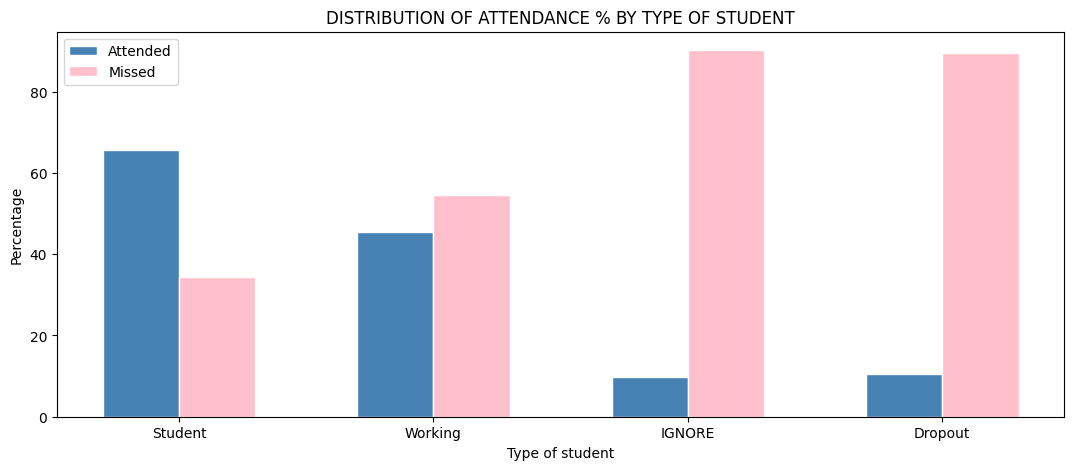

In [235]:
# Create the bar plot
plt.figure(figsize=(13, 5))
plt.bar(r1, attended_percentage, color='steelblue', width=bar_width, edgecolor='white', label='Attended')
plt.bar(r2, missed_percentage, color='pink', width=bar_width, edgecolor='white', label='Missed')

# Add labels, title, and legend
plt.xlabel('Type of student')
plt.ylabel('Percentage')
plt.title('DISTRIBUTION OF ATTENDANCE % BY TYPE OF STUDENT')
plt.xticks([r + bar_width/2 for r in range(len(types))], types)
plt.legend()
# Show the plot
plt.show()

From this graph we can observe that-
--> In case of REGULAR STUDENTS proportion of attended classes and missed classes is almost 6:4 and they are attending their classes.
--> In case of WORKING students the % of missed classes is more than that of attended classes.
--> In case of IGNORE and DROPOUTS we can see that very few amongst them are attending classes whereas majority of them are missing their classes. 

In [236]:
cls1 = df1
cls2 = df2

RATINGS VISUALIZATIONS

--> COMBINED RATINGS VISUALIZATIONS

In [237]:
student_ratings = df[df['Type'] == 'STUDENT'][['Rating_10', 'Rating_9', 'Rating_8', 'Rating_7', 'Rating_6', 'Rating_5', 'Rating_4', 'Rating_3', 'Rating_2', 'Rating_1']]
working_ratings = df[df['Type'] == 'WORKING'][['Rating_10', 'Rating_9', 'Rating_8', 'Rating_7', 'Rating_6', 'Rating_5', 'Rating_4', 'Rating_3', 'Rating_2', 'Rating_1']]
ignore_ratings = df[df['Type'] == 'IGNORE'][['Rating_10', 'Rating_9', 'Rating_8', 'Rating_7', 'Rating_6', 'Rating_5', 'Rating_4', 'Rating_3', 'Rating_2', 'Rating_1']]
dropout_ratings = df[df['Type'] == 'DROPOUT'][['Rating_10', 'Rating_9', 'Rating_8', 'Rating_7', 'Rating_6', 'Rating_5', 'Rating_4', 'Rating_3', 'Rating_2', 'Rating_1']]

student_ratings = student_ratings.values.flatten()
working_ratings = working_ratings.values.flatten()
ignore_ratings = ignore_ratings.values.flatten()
dropout_ratings = dropout_ratings.values.flatten()

In [238]:
ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})


filtered_ratings = df_ratings[(df_ratings['Rating'] >= 5) & (df_ratings['Rating'] <= 7)]

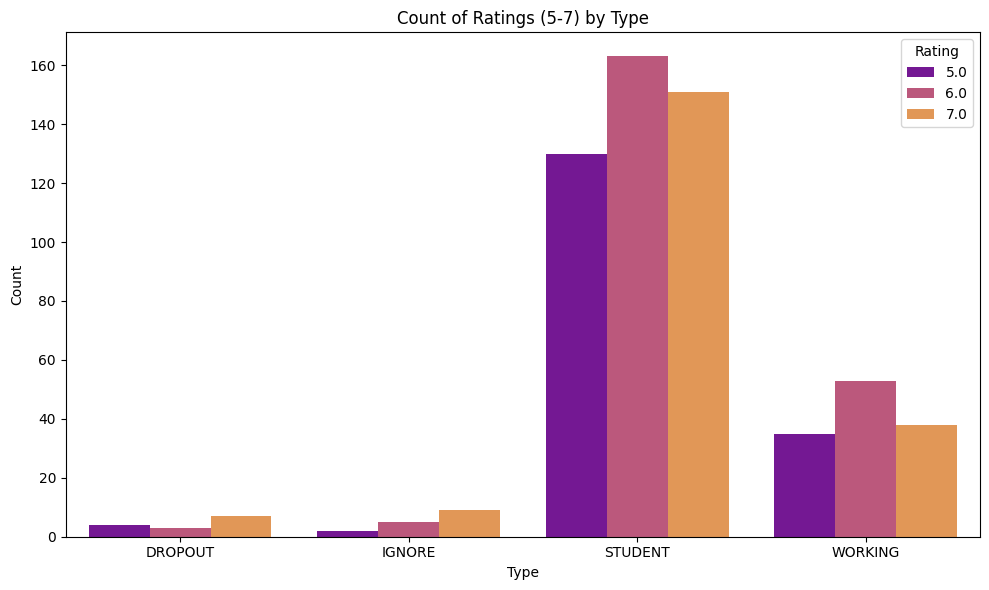

In [239]:
# Count the occurrences of each rating for each type
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

# Plot the multiple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='plasma')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (5-7) by Type')

plt.legend(title='Rating')
plt.tight_layout()
plt.show()

FROM HERE WE CAN SEE THAT HIGHLY UNSATISFIED PEOPLE ARE STUDENTS FOLLOWED BY WORKING PEOPLE.

In [240]:
# Concatenate the ratings and create a new dataframe
ratings = np.concatenate([student_ratings, working_ratings, ignore_ratings, dropout_ratings])
types = ['STUDENT'] * len(student_ratings) + ['WORKING'] * len(working_ratings) + ['IGNORE'] * len(ignore_ratings) + ['DROPOUT'] * len(dropout_ratings)
df_ratings = pd.DataFrame({'Rating': ratings, 'Type': types})

In [241]:
# Filter the ratings within the range of 5-7
filtered_ratings = df_ratings[(df_ratings['Rating'] >= 8) & (df_ratings['Rating'] <= 10)]

# Count the occurrences of each rating for each type
rating_counts = filtered_ratings.groupby(['Type', 'Rating']).size().reset_index(name='Count')

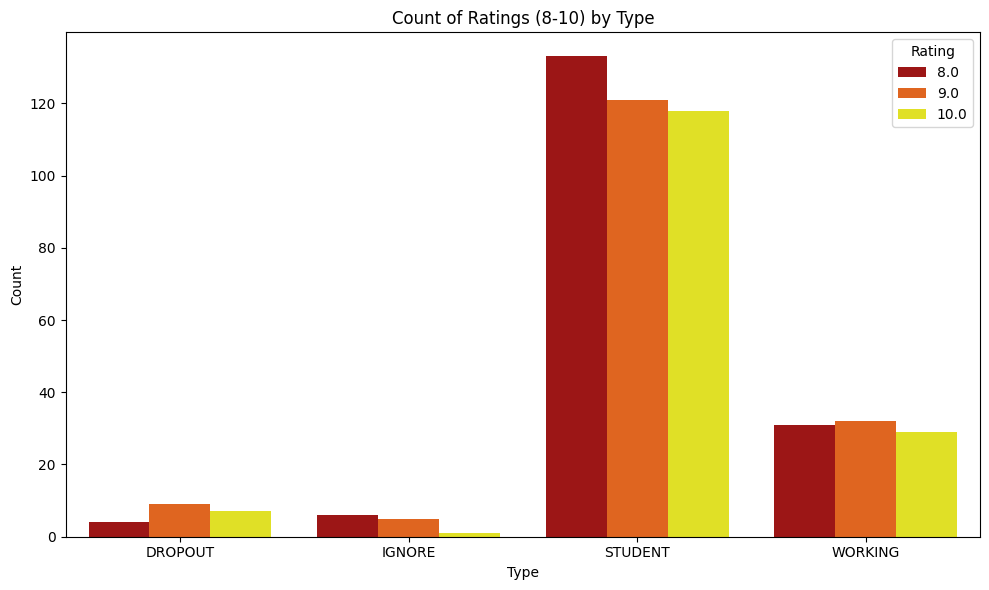

In [242]:
# Plot the multiple bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', hue='Rating', data=rating_counts, palette='hot')

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Ratings (8-10) by Type')

plt.legend(title='Rating')
plt.tight_layout()
plt.show()

FROM HERE WE CAN SEE THAT HIGHEST RATINGS ARE ALSO GIVEN BY STUDENTS ITSELF WHERE THE HIGHEST RATING OF ALL TIME IS 8.